In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, HiveContext
import seaborn as sns

In [2]:
#SparkContext.setSystemProperty("hive.metastore.uris", "mysql://localhost:3306")

In [3]:
sparkSession = (SparkSession
                .builder
                .appName('example-pyspark-read-and-write-from-hive')
                .enableHiveSupport()
                .getOrCreate())

In [4]:
df_load = sparkSession.sql('SELECT * FROM twitter limit 10')
df_load.show()

+-------------------+-----------------+--------------+------------------+--------------------+------------------+--------------------+
|             id_str|       created_at|favorite_count|           user_id|           user_name|     user_location|                text|
+-------------------+-----------------+--------------+------------------+--------------------+------------------+--------------------+
|1175912282712236033|20190922:16:18:30|         40717|         292929271|        Charlie Kirk| Chicago, Illinois|This weekend Trum...|
|1175746952899846144|20190922:05:21:32|         35163|          20094409|        Barb McQuade|     Ann Arbor, MI|While a sitting P...|
|1175539271786094593|20190921:15:36:17|         24940|        4091551984|      Laurence Tribe|                  |This is the momen...|
|1176153059778539522|20190923:08:15:15|             0|          68031291|               CMMGA|                  |RT @AriMelber: Sp...|
|1176153059648425984|20190923:08:15:15|             0| 

In [5]:
#sparkSession.sql("LOAD DATA INPATH 'hdfs://quickstart.cloudera:8020/user/cloudera/output/part-1569164885965.txt' INTO TABLE twitter")

words spot
[u'This weekend Trump supporters volunteered their time to clean up a Democrat city  Media silent  While the left pret& https://t.co/JVSGjhZuHK', u'While a sitting President cannot be indicted, Giuliani can. More facts are needed, but if he brokered deal to trade& https://t.co/SDweOOIvwy', u'This is the moment of truth. Trump must stop suppressing the whistleblower\x19s report now \x14 or face the consequences& https://t.co/OgpYwkYaUd', u'RT @AriMelber: Speaker Pelosi argues Pres. Trump broke the law, but that is best addressed through the next election not impeachment.   Wha&', u'RT @letsberealppl2: Yup, Looks Like That Big Anti-Trump, Whistleblower Story Was All Smoke And Mirrors | Daily Wire https://t.co/m4fz86KVpS&', u"@upzone_Louis @DougKass @jwgop @NPR trump's character has been so poisoned by years of criminal activity that he no& https://t.co/mViE2lmLAK", u"RT @Cruellaisdevine: @brycetache If you can't call your Representative right now...send a quick letter via @The

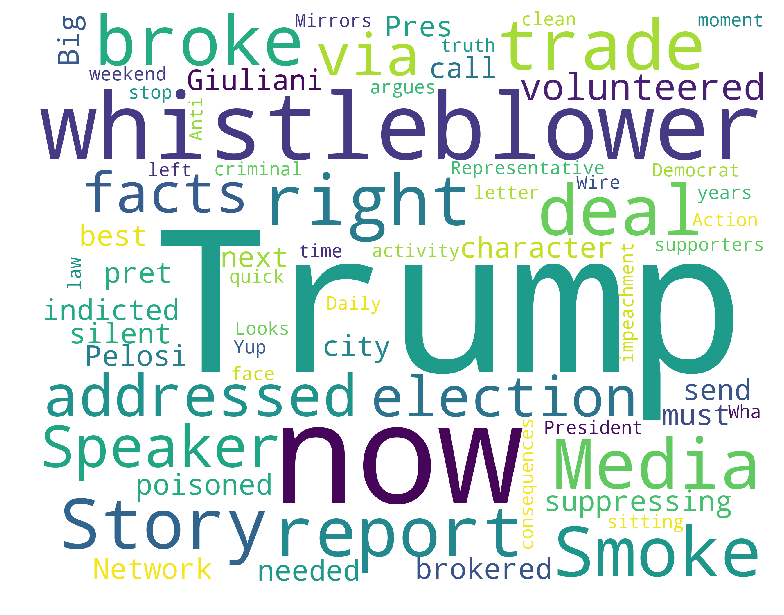

In [6]:

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
def wordcloud_draw(data, color = 'black'):
    k =[]
    for d in data:
        if d !=None: 
            k.append(d)
    data = k
    print(data)
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

    
train_pos = df_load.toPandas()
train_pos = train_pos['text']
print("words spot")
wordcloud_draw(train_pos,'white')

In [7]:
timestatistic = sparkSession.sql("select * from twittertime")

timestatistic.show()


+-----------+-----+
|       time|count|
+-----------+-----+
|#TheResista|    0|
|- 08080 /M|    0|
|20190921:15|  721|
|20190922:05| 1464|
|        USA|    0|
|           |    0|
|       null|    0|
+-----------+-----+



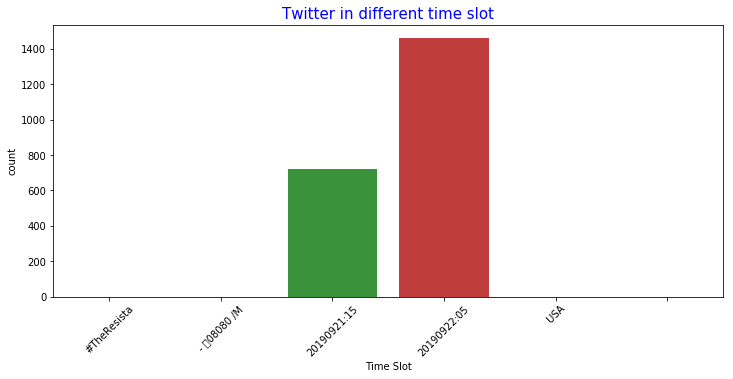

In [8]:
timestatistic = timestatistic.toPandas()
f, ax= plt.subplots(figsize=(12,5))
sns.barplot(x=timestatistic['time'],y=timestatistic['count'])
plt.title("Twitter in different time slot",color = 'blue',fontsize=15)
plt.xlabel('Time Slot')
plt.xticks(rotation=45)
plt.show()

In [9]:
htm = sparkSession.sql("select * from averageword limit 20")
htm.show()



+--------------------+-----+
|       user_location| alen|
+--------------------+-----+
|Redacted For Priv...| 93.0|
|Next to Planet Venus|140.0|
| these United States|140.0|
| North Carolina, USA|140.0|
|   Bengaluru, Bharat|140.0|
|     USA and Canada.|140.0|
|     California, USA|140.0|
|      Wilmington, DE|139.0|
|      United Kingdom|140.0|
|      Tennessee, USA| 98.0|
|       Punjab, India|110.0|
|       Mumbai, India|140.0|
|       Austin, Texas|140.0|
|       Ujjain, India|140.0|
|        Florida, USA|140.0|
|        Brooklyn, NY|140.0|
|         Los Angeles|140.0|
|         At Home=�=�|139.0|
|          Una, India|140.0|
|          California|140.0|
+--------------------+-----+



In [10]:
data = htm.toPandas()
htm.describe()


DataFrame[summary: string, user_location: string, alen: string]

In [11]:
labels = data['user_location'].values
#colors = ['orange','red','magenta','yellow','green']
#explode = [0.1,0.1,0.1,0.1,0.1]
sizes = data['alen'].values

sizes

array([ 93., 140., 140., 140., 140., 140., 140., 139., 140.,  98., 110.,
       140., 140., 140., 140., 140., 140., 139., 140., 140.])

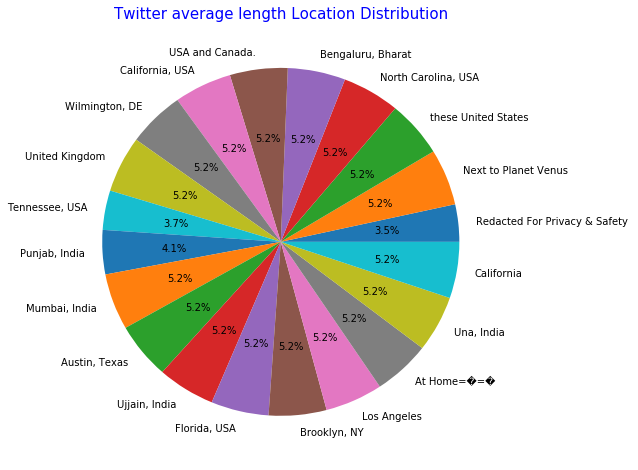

In [15]:
plt.figure(figsize = (8,8))
plt.pie(sizes,  labels=labels, autopct='%1.1f%%')
plt.title('Twitter average length Location Distribution',color = 'blue',fontsize = 15)
plt.show()

In [13]:
userstatistic = sparkSession.sql("select * from maxtwittes")
userstatistic.show()

+-------------------+---+
|            user_id|cnt|
+-------------------+---+
| 996701982499930112|  9|
|           43131318|  9|
|1169177122398560261|  9|
| 987469137403297792|  9|
|         1638007915|  9|
|          333014276|  9|
|           59152065|  9|
| 702070061020753920|  9|
|           48605339|  9|
|           66019603|  9|
|         2905909063|  9|
|          245662961|  9|
|           93075303|  9|
|           18030576|  9|
| 811008691969196032|  9|
| 943447081234006016|  9|
|1097643089059934208|  9|
|         2211337772|  9|
|1097353175751933952|  9|
| 940562939311833088|  9|
+-------------------+---+
only showing top 20 rows



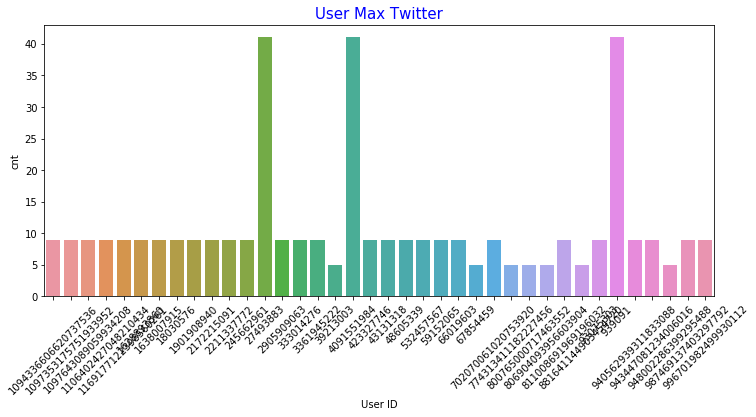

In [14]:
userstatistic = userstatistic.toPandas()
f, ax= plt.subplots(figsize=(12,5))
sns.barplot(x=userstatistic['user_id'],y=userstatistic['cnt'])
plt.title("User Max Twitter",color = 'blue',fontsize=15)
plt.xlabel('User ID')
plt.xticks(rotation=45)
plt.show()